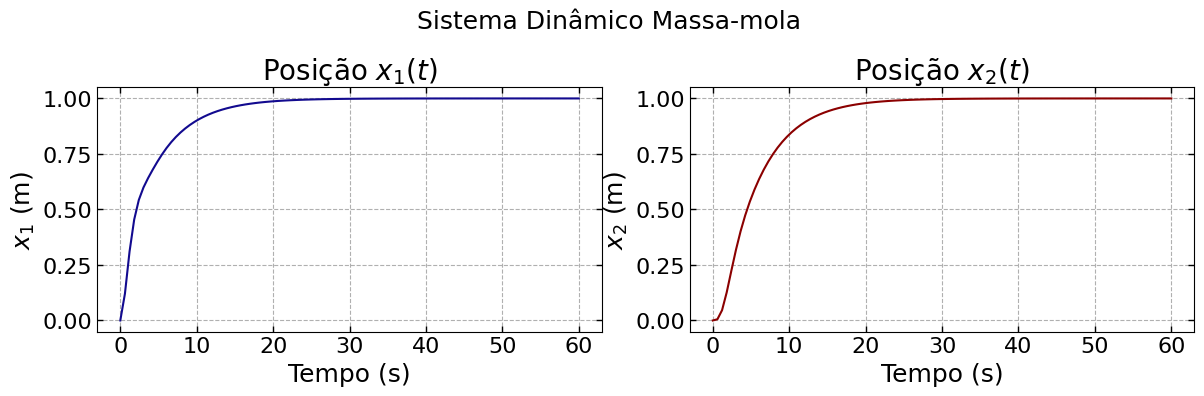

In [37]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt


# Definição dos Parâmetros
m1 = 1.
m2 = 0.5
k1 = 1.
k2 = 1.
c0 = 2.

# Matrizes do sistema massa-mola
A = [
    [0., 0., 1., 0.],
    [0., 0., 0., 1.],
    [-((k1 + k2) / m1), (k2 / m1), - (c0 / m1), 0.],
    [(k2 / m2), - (k2 / m2), 0., - (c0 / m2)]
]

B = [[0.], [0.], [1. / m1], [0.]]

C = [[1, 0, 0, 0], [0, 1, 0, 0]]

D = 0

# Definição do sistema mass-mola
system = ct.ss(
    A, B, C, D,
    name='Sistema Massa-mola',
    inputs=('d'),
    states=('x1', 'x2', 'x1_dot', 'x2_dot'),
    outputs=('x1', 'x2')
)

# Simulação dos Sistemas

# Tempo de simulação: 0 a 60 segundos
timepts = np.linspace(0, 60, 100)

t, y = ct.input_output_response(
    sys=system, T=timepts,
    U=1,
    X0=[0, 0, 0, 0],
)

# Apresentação dos resultados

# Criação e apresentação do gráfico
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
linewidth = 1.5


# Obtenção da saída x1
x1 = y[system.find_output('x1')]

# Gráfico 1 - Corrente do Indutor
axs[0].plot(t, x1,
            linestyle='-', color='#120a8f',
            linewidth=linewidth, alpha=1)

axs[0].set_xlabel('Tempo (s)', fontsize=18)
axs[0].set_ylabel('$x_1$ (m)', fontsize=18)
axs[0].grid(linestyle='--')
axs[0].set_title('Posição $x_1(t)$', fontsize=20)
axs[0].tick_params(axis='both', direction='in', length=4, width=1,
                   colors='black', top=True, right=True, labelsize=16)

# Obtenção da saída x1
x2 = y[system.find_output('x2')]

# Gráfico 2 - Tensão do Capacitor
axs[1].plot(t, x2, linestyle='-',
            color='#8b0000', linewidth=linewidth, alpha=1)

axs[1].set_xlabel('Tempo (s)', fontsize=18)
axs[1].set_ylabel('$x_2$ (m)', fontsize=18)
axs[1].grid(linestyle='--')
axs[1].set_title('Posição $x_2(t)$', fontsize=20)
axs[1].tick_params(axis='both', direction='in', length=4, width=1,
                   colors='black', top=True, right=True, labelsize=16)

fig.suptitle('Sistema Dinâmico Massa-mola', fontsize=18)

plt.tight_layout()


plt.savefig(
    '/home/andel/Projetos/Latex/[TCC] Andevaldo Vitório/figuras/apendices/A/result.eps', format='eps', bbox_inches='tight')

plt.show()